In [79]:
#importing dependencies
import pandas as pd
import numpy as np
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
# Paths to the training, validation, and test datasets
train = 'C:/Users/prera/Documents/Spring 2024/Independent Study/archive (2)/chest_xray/train'
test = 'C:/Users/prera/Documents/Spring 2024/Independent Study/archive (2)/chest_xray/test'
validation = 'C:/Users/prera/Documents/Spring 2024/Independent Study/archive (2)/chest_xray/val'

In [62]:
# Creating an ImageDataGenerator for training data with rescaling and data generators for training, validation, and test datasets
batch_size = 32  # or higher
training_generator = ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(train, target_size=(256, 256), batch_size=batch_size)
validation_generator = ImageDataGenerator(rescale=1/255)
data_valid = validation_generator.flow_from_directory(validation, target_size=(256, 256), batch_size=batch_size)
test_generator = ImageDataGenerator(rescale=1/255)
data_test = test_generator.flow_from_directory(test, target_size=(256, 256), batch_size=batch_size)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [64]:
# Building the Convolutional Neural Network (CNN)
from tensorflow.keras import regularizers

In [65]:
# Sequential model allows us to build a linear stack of layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(256, 256, 3)),   # First convolutional layer with L2 regularization
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer to reduce dimensionality
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),   # Flattening the 2D arrays into a 1D vector
    tf.keras.layers.Dense(64, activation='relu'),    # Fully connected layer with 64 units
    tf.keras.layers.Dense(2, activation='sigmoid')   # Output layer with sigmoid activation for binary classification
])


C:\Users\prera\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# Compiling the model with Adam optimizer, binary crossentropy loss, and accuracy & F1 score metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc','f1_score'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,520,162 (24.87 MB)

 Trainable params: 6,520,162 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Defining early stopping callback to prevent overfitting
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [68]:
# Training the model
history = model.fit(
    data_train,
    epochs=20,
    validation_data=data_valid,
    callbacks=[callbacks]
)

Epoch 1/20


C:\Users\prera\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 837ms/step - acc: 0.8182 - f1_score: 0.7091 - loss: 0.4569 - val_acc: 0.9375 - val_f1_score: 0.9373 - val_loss: 0.4129
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 457ms/step - acc: 0.9638 - f1_score: 0.9518 - loss: 0.1070 - val_acc: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.1974
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 77s 456ms/step - acc: 0.9652 - f1_score: 0.9547 - loss: 0.1091 - val_acc: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.0593
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 76s 454ms/step - acc: 0.9760 - f1_score: 0.9687 - loss: 0.0768 - val_acc: 1.0000 - val_f1_score: 1.0000 - val_loss: 0.0448
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 436ms/step - acc: 0.9840 - f1_score: 0.9786 - loss: 0.0573 - val_acc: 0.8750 - val_f1_score: 0.8730 - val_loss: 0.2188
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 419ms/step - acc: 0.9801 - f1_score: 0.9740 - loss: 0.0625 - val_acc: 0.8750 - val_f1_score: 0.8730 - val_loss: 0.2772
Epoch 7/20
163/163 ━━━━━━━━━━━━━

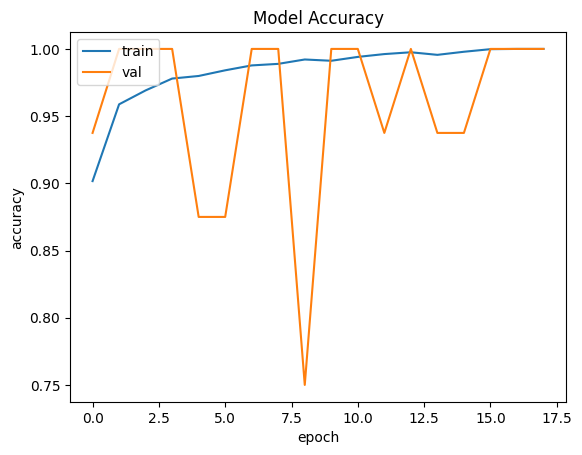

In [78]:
# Plotting training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy'),
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

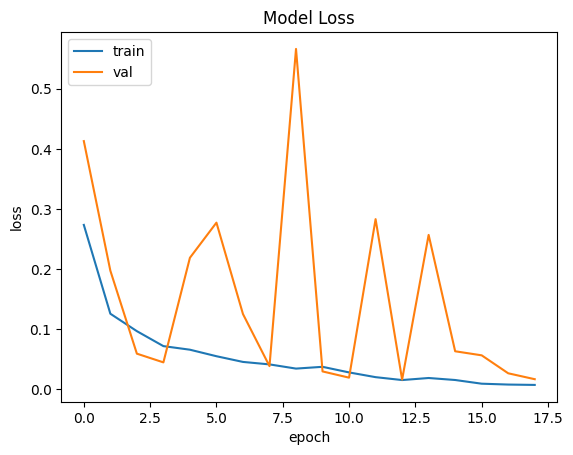

In [70]:
# Plotting training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss'),
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

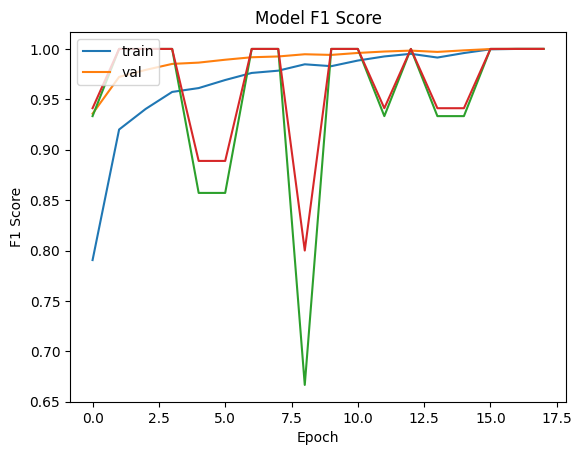

In [71]:
# Plotting training and validation F1 score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title("Model F1 Score")
plt.ylabel("F1 Score")
plt.xlabel("Epoch")
plt.legend(['train','val'],loc="upper left")
plt.show()

In [72]:
# Evaluating the model on the test data
results = model.evaluate(data_test,verbose=0)
print(results)

[4.4059672355651855, 0.7612179517745972, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.5386996, 0.8389189], dtype=float32)>]


In [73]:
# Generating predictions on the test data
print("    Test Loss : {:.5f}".format(results[0]))
print("Test Accuracy : {:.2f}".format(results[1]*100))

    Test Loss : 4.40597
Test Accuracy : 76.12


In [74]:
# Generating predictions on the test data
pred = model.predict(data_test)
pred = np.argmax(pred, axis=1)

# Mapping class indices to labels
labels = data_test.class_indices
labels = {v: k for k, v in labels.items()}

# Assigning predicted labels to the predictions
pred = [labels[k] for k in pred]


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step


In [75]:
# Printing predictions
print(pred)

['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEU

In [76]:
# Generating and printing the classification report
from sklearn.metrics import classification_report

y_test = list(data_test.labels)

# Example mapping from class names to numeric labels
class_to_label = {0 :"NORMAL", 1 :"PNEUMONIA"}

# Convert true labels (strings) to numeric labels
numeric_true_labels = [class_to_label.get(label, -1) for label in y_test]

# Now use numeric_true_labels in the classification report
print(classification_report(numeric_true_labels, pred))

              precision    recall  f1-score   support

      NORMAL       0.38      0.15      0.21       234
   PNEUMONIA       0.63      0.86      0.72       390

    accuracy                           0.59       624
   macro avg       0.50      0.50      0.47       624
weighted avg       0.53      0.59      0.53       624



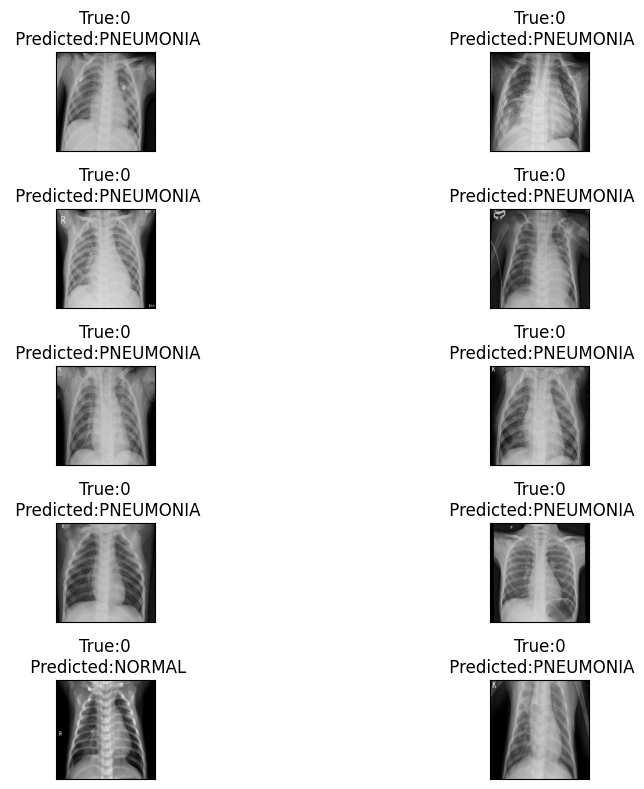

In [77]:
# Visualizing some of the test images with their true and predicted labels
batch_images, batch_labels = next(data_test)

fig,axes = plt.subplots(nrows=5,ncols=2,figsize=(12,8),subplot_kw={'xticks':[],'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(batch_images[i])
    ax.set_title(f"True:{data_test.classes[i]}\n Predicted:{pred[i]}")

plt.tight_layout()
plt.show()
           